# Application 2: Introduction to the data and Xarray
To start off, let us have a look at our data, which is comprised of tweets and precipitation at the time of creation and the location of the tweet.
To look at the data we will use Xarray. 

Xarray is a great library to use when analyzing and working with data provided as a multi-dimensional array. A great example for this would be weather data, where much of its relevant data for weather maps like pressure, temperature, precipitation, etc. contains three dimensions, i.e. time, latitude and longitude. 

In this notebook, we will try to understand the basic features of the [Xarrray api](https://docs.xarray.dev/en/stable/api.html) .

To load the data just use `xarray.load_dataset`. The data is located 

In [11]:
# allows update of external libraries without need to reload package
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import xarray
import datetime
import numpy as np
import pandas as pd

import sys

sys.path.append("../scripts")

In [13]:
FOLDER_DATA = "/p/project/deepacf/maelstrom/haque1/dataset/"
# FOLDER_TO_TWEETS = FOLDER_DATA + "tweets_2017_01_era5_normed.nc"
FOLDER_TO_TWEETS = FOLDER_DATA + "2017_2020_tweets_rain_sun_vocab_emojis_locations_bba_Tp_era5_no_bots_normalized_filtered_weather_stations_fix_predicted_simpledeberta_radar.nc"
ds_tweets = xarray.load_dataset(FOLDER_TO_TWEETS)  # load the 2017 subset of the Tweets

In [14]:
##########################
#       Optional         #
##########################
# Get the total number of data points in your dataset
total_data_points = ds_tweets.dims['index']

# Calculate the number of data points you want to keep (10% of the total)
sample_size = int(0.1 * total_data_points)

# Generate random indices for subsampling
random_indices = np.random.choice(total_data_points, sample_size, replace=False)

# Select the subset of the dataset using the random indices
ds_tweets_subsampled = ds_tweets.isel(index=random_indices)

# Define the file path for the new 
output_file_path = FOLDER_DATA + "20_percent_2017_2020_tweets_rain_sun_vocab_emojis_locations_bba_Tp_era5_no_bots_normalized_filtered_weather_stations_fix_predicted_simpledeberta_radar.nc"

# Save the subsampled dataset to the new file
# Save the subsampled dataset to the new file
ds_tweets_subsampled.to_netcdf(output_file_path)

In [15]:
# 10% of total data
FOLDER_TO_TWEETS = FOLDER_DATA + "20_percent_2017_2020_tweets_rain_sun_vocab_emojis_locations_bba_Tp_era5_no_bots_normalized_filtered_weather_stations_fix_predicted_simpledeberta_radar.nc"
ds_tweets= xarray.load_dataset(FOLDER_TO_TWEETS)  # load the 2017 subset of the Tweets 10 percent

In [16]:
ds_tweets

<xarray.Dataset>
Dimensions:                             (index: 121860)
Coordinates:
  * index                               (index) int64 484051 106155 ... 10039
Data variables: (12/58)
    text                                (index) object 'As the sun goes down,...
    conversation_id                     (index) object '986671498382454790' ....
    lang                                (index) object 'en' 'en' ... 'en' 'en'
    reply_settings                      (index) object 'everyone' ... 'everyone'
    source                              (index) object 'Instagram' ... 'Twitt...
    author_id                           (index) object '20773923' ... '210208...
    ...                                  ...
    x_ngt_rounded                       (index) float64 5.285e+05 ... 2.345e+05
    y_ngt_rounded                       (index) float64 1.805e+05 ... 6.545e+05
    time_radar                          (index) datetime64[ns] 2018-04-18T18:...
    tp_mm_radar                         (index) float64 0.0 0.0 0.0 ... 0.0 0.0
    time_radar_int                      (index) int64 1524075900000000000 ......
    created_at_rounded_5                (index) datetime64[ns] 2018-04-18T18:...
Attributes:
    description:  added locationsadded locationsadded locationsadded location...

## Exercise 0: Overview of datasets

The **Tweets dataset** contains many fields, for us the most interesting will be `text` (text of the Tweets) and `tp` (Total precipitation, which is the accumulated precipitation within an hour in units of metres in depth the water would have if it were spread evenly over the grid box (0.1x0.1 degrees squared) ). The dataset can be found in `/p/project/training2223/a2/data/tweets`.

I summarize the meaning of all fields in the following. Most of them are related to Twitter and are also summarized on [Twitter's website](https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-all):
* Coordinate fields: `index`: Unique index for xarray, which can be used to select Tweets. All other fields are so called data variables, which may become relevant when using xarray.
* `text`: **Text of Tweet**. Already preprocessed for training including converting emojis and text normalization.
* `text_original`: Raw Tweet data.
* `tp_h`: **Total precipitation in meters.** Corresponds to the equivalent height of filling a resolution element (0.1x0.1 square degrees) within an hour. ([see ECMWF webpage for more details](https://apps.ecmwf.int/codes/grib/param-db/?id=228)).
* `raining`: **If it is raining** at the Tweets location/time (raining = 1, not raining = 0). Rain is assumed if the total precipitation is above zero and above the nummerical floor (at ~1e-8m).
* `created_at`: **Date and time of Tweet creation.**
* `time_half`: `created_at` rounded to nearest half past to align precipitation data and Tweets.
* `source`: The name of the app the user Tweeted from.
* `author_id`: Id of the author.
* `id`: Id of the Tweet itself.
* Fields related to location: 
    * `geo.place_id`: Id of the tagged location.
    * `geo.coordinates.type`: Type of the location (empty if tagged location).
    * `geo.coordinates.coordinates`: Exact GPS location of device when the Tweet was sent (if user opted in).
    * `longitude`: Longitude of Tweet (GPS location or center of tagged location).
    * `latitude`: Latitude of Tweet (GPS location or center of tagged location).
    * `latitude_rounded`: Latitude of Tweet rounded to resolution of precipitation map (0.1 degree) 
    * `longitude_rounded`: Longitude of Tweet rounded to resolution of precipitation map (0.1 degree) 
    * `coordinates_estimated`: Location of Tweet estimated from center of tagged location (if tagged = 1, if GPS location available = 0).
    * `centroid`: Center of *tagged* location.
    * `centroid_longitude`: Longitude of *tagged* location.
    * `centroid_latitude`: Latitude of *tagged* location.
    * `place_type`: Place type of *tagged* location.
    * `bounding_box`: Bounding box of *tagged* location.
    * `full_name`: Full name of *tagged* location.
    * `bounding_box_area`: Area of central bounding box in squared kilometres.
* Fields related to metrics:
    * `public_metrics.retweet_count`: Retweet count.
    * `public_metrics.reply_count`: Reply count to Tweet.
    * `public_metrics.like_count`: Number of counts of Tweet.
    * `public_metrics.quote_count`: Number of times this Tweet has been Retweeted with a comment.
* `conversation_id`: Id of conversation (Tweets can also be replied for example, so multiple Tweets can generally share the `conversation_id`)
* `lang`: Languague of the Tweets
* `reply_settings`: Shows who can reply to this Tweet.
* `referenced_tweets`: A list of Tweets this Tweet refers to.
* `in_reply_to_user_id`: If this Tweet is a Reply, indicates the user ID of the parent Tweet's author. 

In [7]:
# load ecmwf forecasting weather model from 2017 for europe
FOLDER_DATA = "/p/project/deepacf/maelstrom/haque1/dataset/"
FOLDER_TO_PRECIPITATION = FOLDER_DATA + "ds_precipitation_2017.nc"
# FOLDER_TO_PRECIPITATION = (
#     "/p/project/training2223/a2/data/precipitation/ds_precipitation_2017.nc"
# )

ds_prec = xarray.load_dataset(FOLDER_TO_PRECIPITATION)

In [8]:
# ##########################
# #       Optional         #
# ##########################
# # Calculate the number of data points to keep (10% of the original dataset)
# total_data_points = ds_prec.dims['time']

# # Calculate the number of data points you want to keep (10% of the total)
# sample_size = int(0.1 * total_data_points)

# # Generate random indices for subsampling
# random_indices = np.random.choice(total_data_points, sample_size, replace=False)

# # Select the subset of the dataset using the random indices
# ds_prec_subsampled = ds_prec.isel(time=random_indices)

# # Now, ds_prec_subsampled contains only 10% of the original dataset
# # Define the file path for the new NetCDF file
# output_file = FOLDER_DATA + "ds_precipitation_10_percent.nc"

# # Save the subsampled dataset to the new file
# ds_prec_subsampled.to_netcdf(output_file_path)

In [9]:
FOLDER_DATA = "/p/project/deepacf/maelstrom/haque1/dataset/"

FOLDER_TO_PRECIPITATION = FOLDER_DATA + "ds_precipitation_10_percent.nc"
# FOLDER_TO_PRECIPITATION = (
#     "/p/project/training2223/a2/data/precipitation/ds_precipitation_2017.nc"
# )

ds_prec = xarray.load_dataset(FOLDER_TO_PRECIPITATION)

In [10]:
ds_prec

<xarray.Dataset>
Dimensions:  (time: 0, latitude: 351, longitude: 551)
Dimensions without coordinates: time, latitude, longitude
Data variables:
    tp       (time, latitude, longitude) float32

In addition, we have the **precipitation datasets** describing total precipitation in Europe from 2017 to 2020 (divided up into one dataset per year) at an hourly temporal resolution and 0.1 x 0.1 square degrees spatial resolution. The datasets can be found in `/p/project/training2223/a2/data/precipitation`.

Coordinates:
* `time`: Time (always half past)
* `latitude`: Latitude
* `longitude`: Longitude

Data variables:
* `tp`: Total precipitation, see above.


## Task:
* Check the data type of the variables and coordinates in the precipitation dataset `ds_prec`. Do you know how to 'handle' them in python? If not, find out a bit about the 'new' datatype.

## Exercise 1: Hands on with the precipitation data and introduction to plotting with xarray
Let's now look at the data with xarray via some questions regarding the data. To solve the problems, you could plot the data or select the relevant parts of the data. Let's first look at plotting with xarray. Usually plots show up below the executed cell. However, if this is not the case calling `%matplotlib inline` may make them show up again.

`ds_tweets` and `ds_prec` are a so called `xarray.Dataset`. Just calling a single variable of the dataset can be done via `ds_prec['tp']` or `ds_prec.tp` like in the popular [pandas](https://pandas.pydata.org/docs/user_guide/index.html) library. Both `ds_prec['tp']` and `ds_prec.tp` are a `xarray.DataArray` which is in internal type of the Xarray library. However, if you just want the raw data of the variable you can just call `ds_prec['tp'].values` and `ds_prec.tp.values`, which gives the variable as a `numpy.array`. Distinguishing between `xarray.Dataset` and `xarray.DataArray` is quite important as many operations are tied to either type so look carefully for the type you are dealing with when checking the [API reference](https://docs.xarray.dev/en/stable/api.html) of Xarray.

### 1.1 Plotting a histogram
For a simple histogram of a variable in our dataset, we can directly rely on xarrays inbuilt functionality. For example, to plot the distribution of our variable `tp` (total precipitation), we just call `ds_prec.tp.plot.hist()`. However, it seems that the default bins are not really optimized for our data field. To improve on this, we will introduce user-defined bins.

(array([1.69327549e+09, 8.57603000e+05, 5.00230000e+04, 7.50300000e+03,
        1.56100000e+03, 3.88000000e+02, 1.19000000e+02, 4.60000000e+01,
        1.90000000e+01, 4.00000000e+00]),
 array([-1.0102987e-05,  4.6501970e-03,  9.3104970e-03,  1.3970798e-02,
         1.8631097e-02,  2.3291398e-02,  2.7951699e-02,  3.2612000e-02,
         3.7272297e-02,  4.1932598e-02,  4.6592899e-02], dtype=float32),
 <BarContainer object of 10 artists>)

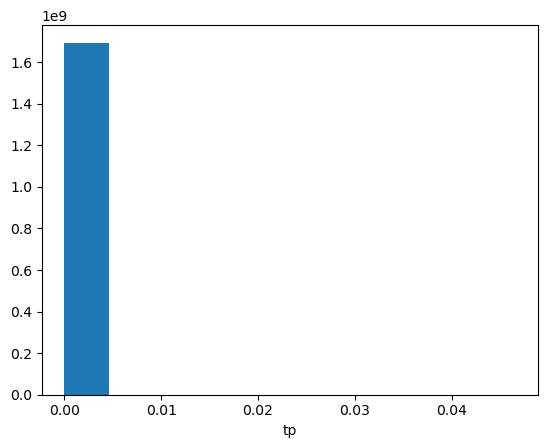

In [14]:
%matplotlib inline
ds_prec.tp.plot.hist()

In [15]:
np.min(abs(ds_prec.tp.values[ds_prec.tp.values != 0])), np.max(ds_prec.tp.values)

(5.271286e-07, 0.0465929)

The plotting functions contained in `scipts/plotting` will be useful throughout the tutorials to save time and energy. So, let's use them to compute our desired bins. We realize that we actually have negative values in our dataset. This is of course unphysical but an artifact of how the simulation treats this data field. Due to such a vast range in values that is both positive and negative it probably makes sense to use the 'symmetrical log' (see [this stack overflow question](https://stackoverflow.com/questions/3305865/what-is-the-difference-between-log-and-symlog) for more information on 'symlog'). Fundamentally, it allows you to have logarithmically spaced bins up to the linear threshold, below which a linear scale is used (to prevent divergences at 0).

The plotting functionality in xarray relies heavily on [matplotlib](https://matplotlib.org/stable/tutorials/index.html), which you have probably encountered before. The basic concept of matplotlib is that you have a `plt.figure`, which is your canvas or your page on which you are going to plot. But you can of course plot many different plots on a single page, so they introduce a `plt.axes`, which holds a single plot (or other 'plot like' objects like a colorbar). 

Therefore, after creating our bins, we first initialize a single axes and figure for our plot with the function `plotting.utils_plotting.create_figure_axes` (Remember that you can use the question mark to check arguments and documentation on functions, i.e. `plotting.utils_plotting.create_figure_axes?`). Then we plot our histogram on this axes. Finally, we change the scale of our x-axis to 'symlog' and the scalebar of our y-axis to 'log'.

In [16]:
import plotting

<AxesSubplot:xlabel='tp'>

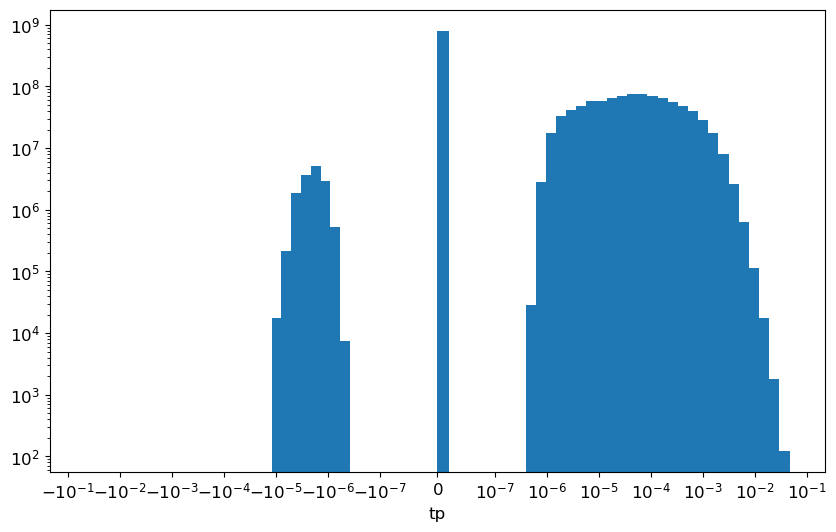

In [17]:
# execution may take some time ....
linear_thresh = 1e-7
bins = plotting.histograms.get_bin_edges(
    vmin=None,
    vmax=None,
    linear_thresh=linear_thresh,
    n_bins=60,
    data=ds_prec.tp.values,
    log="symlog",
)

# initialize a figure `figure` and an axes `ax`
figure, ax = plotting.utils_plotting.create_figure_axes()
# plot our histogram using our user-defined bins

ds_prec.tp.plot.hist(bins=bins, ax=ax)

# change the x-axis scale to a symmetrical log scale
plotting.utils_plotting.set_x_log(ax=ax, log="symlog", linear_thresh=linear_thresh)

# change the y-axis scale to a logarithmic scale
plotting.utils_plotting.set_y_log(ax=ax, log=True)

To reduce the dataset according to a certain selection the dataset method `xarray.Dataset.where` can be used. Let's only select data that lies within a cube of sidelength 1 degree latitude and longitude around the Brandenburg gate (52°30'58.0"N 13°22'39.1"E). Longitude and latitude are given in decimal degrees in our dataset, so we can convert the location from DMS (degrees, minutes, seconds) to decimal degrees. You can do this by hand or use an [online GPS converter](https://www.gps-coordinates.net/gps-coordinates-converter), which yields `Latitude = 52.5162804` and `Longitude = 13.3777019`. By default `xarray.Dataset.where` will just mask out all values that do not fulfill the selection and set them to `nan` values. We use `drop=True` to remove them from dataset instead. We store the 'Berlin' dataset to a new variable `ds_berlin`. Afterwards, we plot the distribution of our subselection dataset.

In [18]:
ds_berlin = ds_prec.where(
    (ds_prec.latitude < 52.5162804 + 0.5)
    & (ds_prec.latitude > 52.5162804 - 0.5)
    & (ds_prec.longitude > 13.3777019 - 0.5)
    & (ds_prec.longitude < 13.3777019 + 0.5),
    drop=True,
)
ds_berlin

<xarray.Dataset>
Dimensions:    (time: 8760, latitude: 10, longitude: 10)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01T00:30:00 ... 2017-12-31T23:30:00
  * latitude   (latitude) float32 53.0 52.9 52.8 52.7 ... 52.4 52.3 52.2 52.1
  * longitude  (longitude) float32 12.9 13.0 13.1 13.2 ... 13.5 13.6 13.7 13.8
Data variables:
    tp         (time, latitude, longitude) float32 6.832e-06 4.556e-06 ... 0.0

<AxesSubplot:xlabel='tp'>

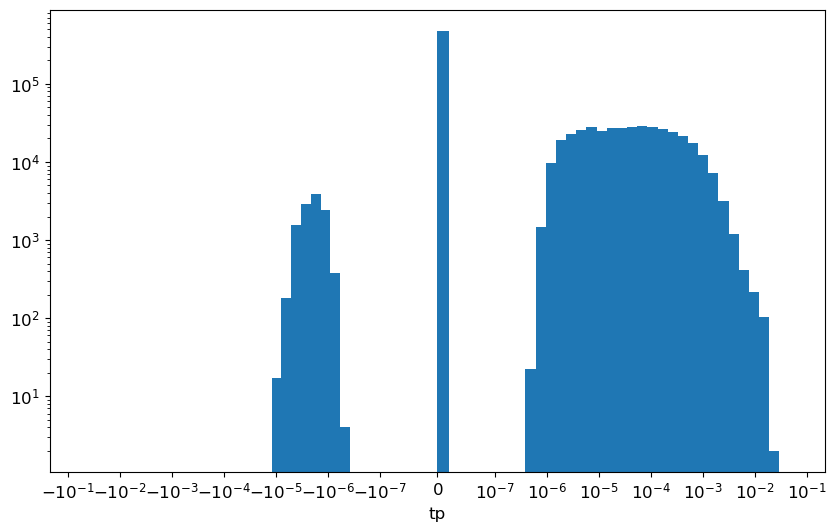

In [19]:
linear_thresh = 1e-7

bins = plotting.histograms.get_bin_edges(
    vmin=None,
    vmax=None,
    linear_thresh=linear_thresh,
    n_bins=60,
    data=ds_prec.tp.values,
    log="symlog",
)

# initialize a figure `figure` and an axes `ax`
figure, ax = plotting.utils_plotting.create_figure_axes()

# plot our histogram using our user-defined bins
ds_berlin.tp.plot.hist(bins=bins, ax=ax)

# change the x-axis scale to a symmetrical log scale
plotting.utils_plotting.set_x_log(ax=ax, log="symlog", linear_thresh=linear_thresh)

# change the y-axis scale to a logarithmic scale
plotting.utils_plotting.set_y_log(ax=ax, log=True)

### 1.2 Plotting a map
Let's now plot a map of the the total precipitation. We will decide on a point in time first, let's use 17:30 in the used 24-hour clock convention (corresponds to 5:30 pm) on 1. July 2017. For this, we need to create a date time object let's use `numpy` as this is the format used by xarray. We can instantiate it by calling ` np.datetime64('2017-07-01T17:30:00')` 

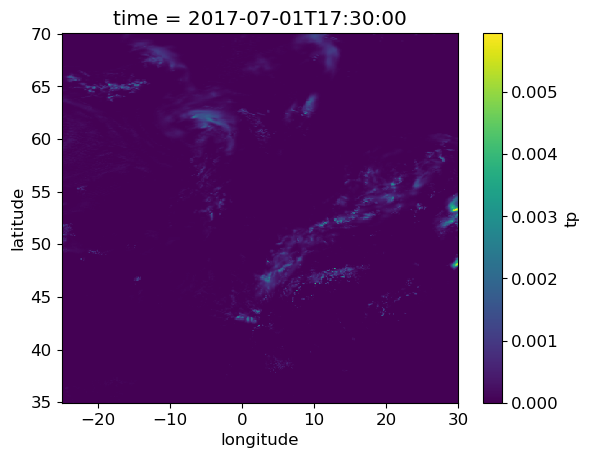

In [20]:
ds_prec.sel(time=np.datetime64("2017-07-01T17:30:00")).tp.plot()

## Tasks:
1. Was it raining in the "Greater London" area at 2:30pm on 2nd January 2017? 

    *Hint*, for this task and the following, you can assume that "Greater London" is a cube of side length 40 km centered on Waterloo station. 
2. Was it raining in the greater London area at any time on 2nd January 2017? 
3. Make a plot of the precipitation data on 2017-07-01 at 12:30 am and zoom onto your favorite European country (arguments `min` and `max` of xarray's `plot` function may come in handy).
4. Use a logarithmic colorbar (the keyword `norm` and the matplotlib object `matplotlib.colors.LogNorm`) and change up the colormap.

## Exercise 2: Hands on with the Tweets
Now let's turn to the tweets and get a feel for the data.

### Group by in xarray
Grouping datasets by a certain value of a variable is a useful tool to have. Let's for example look at the most relevant `place_type`. Unfortunately, this operation can be quite slow especially if many different unique values exist for the `group_by` field .... So we would like to save the result as a new dataframe.

In [21]:
def get_grouped_dataset(ds, group_by, sort_by="id"):
    ds_grouped_unsorted = ds.groupby(group_by).count()
    ds_grouped = ds_grouped_unsorted.sortby(sort_by, ascending=False)
    return ds_grouped


ds_grouped = get_grouped_dataset(ds_tweets, group_by="place_type")

In [22]:
keys = ds_grouped["place_type"].values
values = ds_grouped["id"].values
for k, v in zip(keys, values):
    print(f"{k}: {v}")

city: 86942
: 29629
poi: 5289


We notice, that most locations are attributed to 'cities'. The second most relevant `place_type` is an empty string, which is used for places that were not tagged but for which GPUs locations exist.

## Tasks:
1. By just looking at the Tweets, e.g. the first 100 Tweets (`ds_tweets['text_original'].values[:100]']`) and taking another look at the overview of the Tweet dataset in Exercise 0, try to estimate how they were queried from Twitter (e.g., which keywords used? what properties do the Tweets have?). Let's discuss! 
2. Let's look at the distribution of the Twitter keywords. Make a histogram of the Tweets containing any of the following keywords. You can find a useful function for this in `plotting.histograms`.
3. Find the most crucial sources for the Tweets (Top 10 most used apps to tweet).
4. Find something new and interesting about the data and share it with the group!

In [23]:
emojis = [
    "🏔️",
    "🏔",
    "☀️",
    "☀",
    "🌞",
    "⛅",
    "⛈️",
    "⛈",
    "🌤️",
    "🌤",
    "🌥️",
    "🌥",
    "🌦️",
    "🌦",
    "🌧️",
    "🌧",
    "🌨️",
    "🌨",
    "🌩️",
    "🌩",
    "☔",
    "⛄",
]
keywords = emojis + [
    "blizzard",
    "cloudburst",
    "downpour",
    "drizzle",
    "flash flood",
    "flood",
    "flood stage",
    "forecast",
    "freezing rain",
    "hail",
    "ice storm",
    "lightning",
    "precipitation",
    "rain",
    "rain gauge",
    "rain shadow",
    "rainbands",
    "rain shower",
    "snow",
    "snow shower",
    "snowstorm",
    "sun",
    "sunny",
    "thunder",
    "thunderstorm",
]

In [24]:
ds_tweets.source

<xarray.DataArray 'source' (index: 121860)>
array(['Twitter for iPad', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for Android', 'Twitter for Android', 'Instagram'],
      dtype=object)
Coordinates:
  * index    (index) int64 1103539 743338 625605 509412 ... 943900 793513 83135

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Logarithmic y-axis'}, xlabel='keywords', ylabel='counts'>,
        <AxesSubplot:title={'center':'Linear y-axis'}, xlabel='keywords', ylabel='counts'>],
       dtype=object))

/p/software/juwelsbooster/stages/2023/software/IPython/8.14.0-GCCcore-11.3.0/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/p/software/juwelsbooster/stages/2023/software/IPython/8.14.0-GCCcore-11.3.0/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/p/software/juwelsbooster/stages/2023/software/IPython/8.14.0-GCCcore-11.3.0/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/p/software/juwelsbooster/stages/2023/software/IPython/8.14.0-GCCcore-11.3.0/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from current font.
  fig.canvas.pr

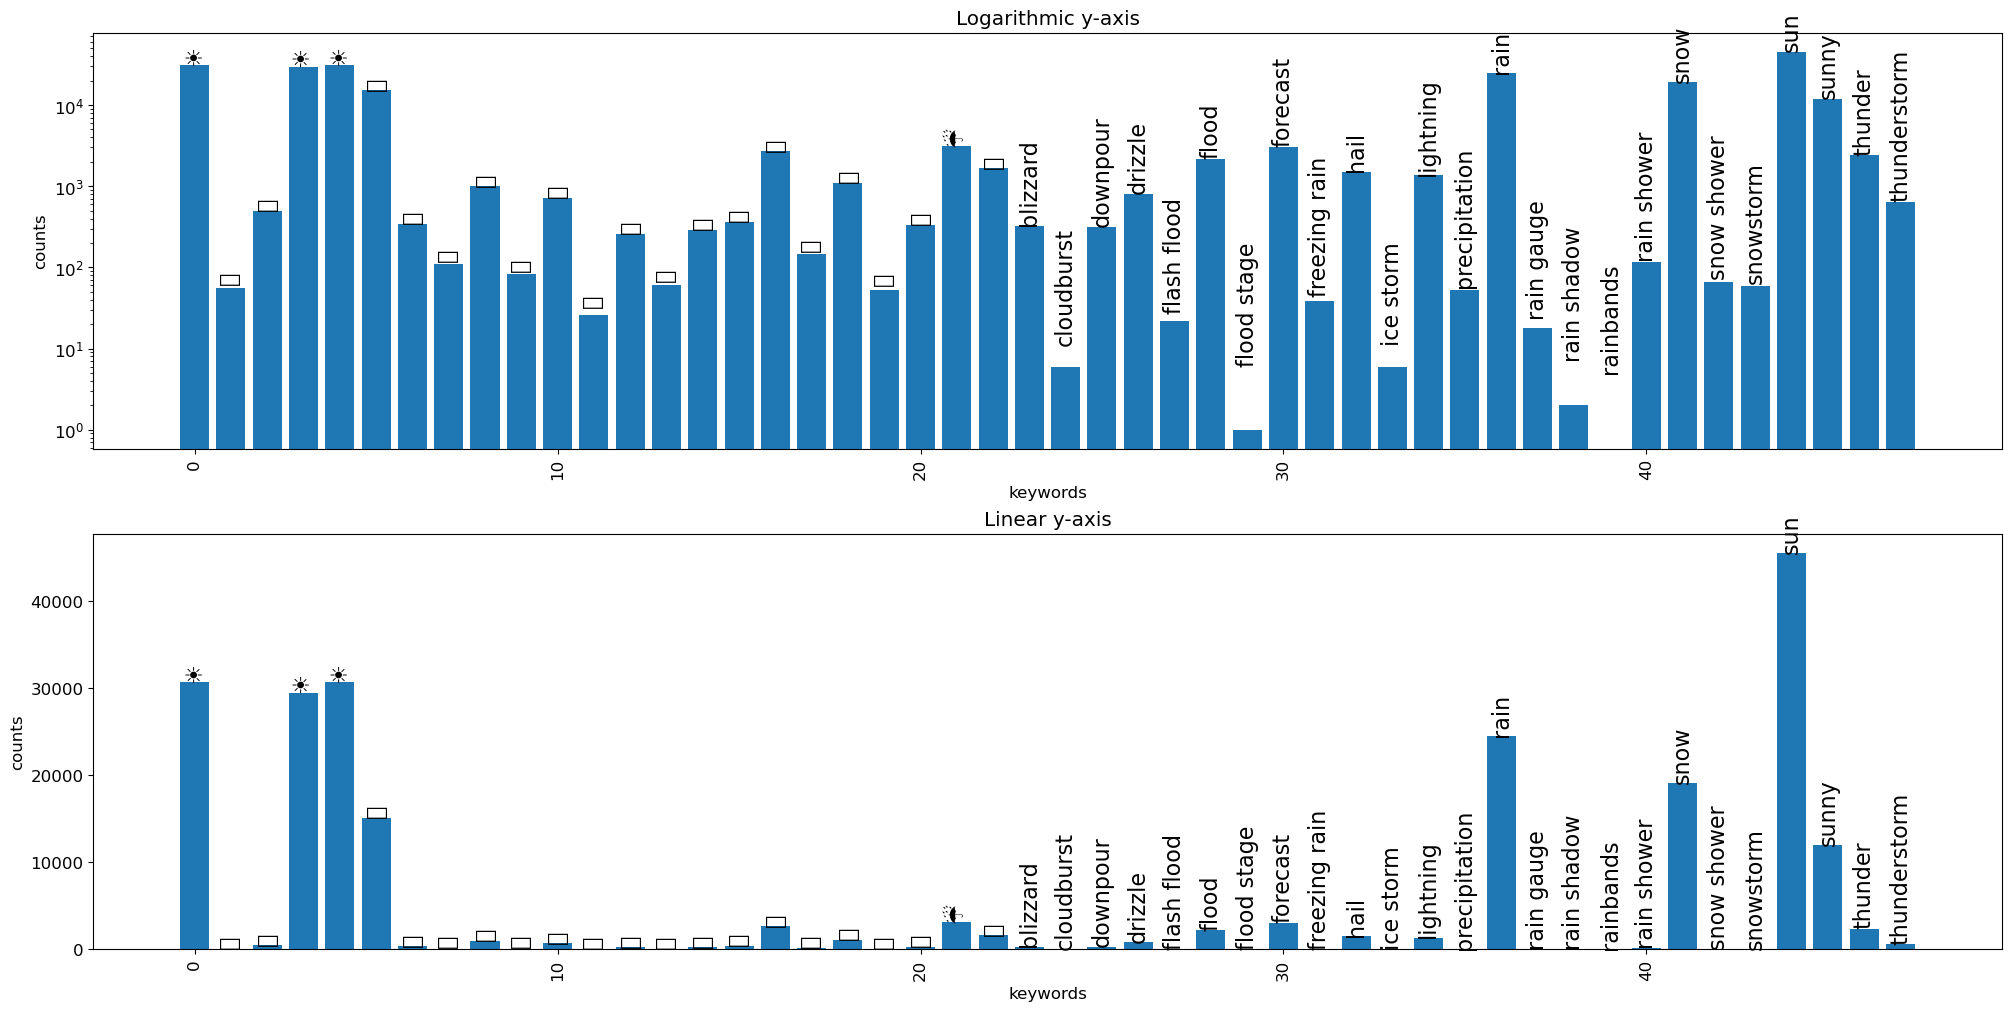

In [25]:
plotting.histograms.plot_distribution_keywords(ds_tweets.text.values, keywords)

In [26]:
emojis

['🏔️',
 '🏔',
 '☀️',
 '☀',
 '🌞',
 '⛅',
 '⛈️',
 '⛈',
 '🌤️',
 '🌤',
 '🌥️',
 '🌥',
 '🌦️',
 '🌦',
 '🌧️',
 '🌧',
 '🌨️',
 '🌨',
 '🌩️',
 '🌩',
 '☔',
 '⛄']